# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/'

In [ ]:
import pickle
import pandas as pd

# Data loading with pickle
with open(f'{data_path}X_matrix.pkl', 'rb') as x_file, open(f'{data_path}y_labels.pkl', 'rb') as y_file:
    X = pickle.load(x_file)
    y = pickle.load(y_file)

# Data loading from csv
preprocessed_reviews = pd.read_csv(f'{data_path}preprocessed_reviews.csv')


print("Data loaded successfully.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Preprocessed shape: {preprocessed_reviews.shape}")


Data loaded successfully.
X shape: (500, 733)
y shape: (500,)
Preprocessed shape: (500, 1)


In [ ]:
preprocessed_reviews.isna().sum()

,0
review,4


In [ ]:
preprocessed_reviews = preprocessed_reviews.dropna(subset=['review'])

In [ ]:
preprocessed_reviews.isna().sum()

,0
review,0


In [ ]:
# Check if there are any more NaN values
print(f"NaN values after cleaning:\n{preprocessed_reviews.isna().sum()}")

NaN values after cleaning:
review    0
dtype: int64


# Data split

Encontré que preprocessed_reviews tenía NaNs así que he hecho un parche.

In [ ]:
import numpy as np

# Filter the rows of X and y where X is neither NaN nor empty
valid_indices = [i for i, review in enumerate(preprocessed_reviews['review']) if review is not None and review != '']

# Filter X and y using the valid indices
X_clean = preprocessed_reviews.iloc[valid_indices]['review'].tolist() # .iloc used for integer-location based indexing
y_clean = [y[i] for i in valid_indices]

# Verify both have the same size
print(f"X_clean shape: {len(X_clean)}")
print(f"y_clean shape: {len(y_clean)}")

from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Check split dimensions
print(f"X_train shape: {len(X_train)}")
print(f"X_test shape: {len(X_test)}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")

X_clean shape: 496
y_clean shape: 496
X_train shape: 396
X_test shape: 100
y_train shape: 396
y_test shape: 100


In [ ]:
# Check for empty strings or None values in X_train
num_missing = sum(1 for review in X_train if review is None or review == '')
print(f"Number of missing values in X_train: {num_missing}")

Number of missing values in X_train: 0


In [ ]:
print(type(X_train))
print(X_train[:5])

<class 'list'>
['treat collector presentation stunning fun box sturdy book certificate prove uniqueness set hardcore hold fan useful strategy cool keepsake', 'memory card plantation help have memory card annoying have card cause fill way save state system', 'lava croft game good remember come year ago teen practically drool controller time see liras pretty face tomb raider advertise like groundbreaking video game hit freaking market thing game boring lava croft pretty girl thing thing know think lava croft million internet gamer understand computer babe go automatically game fun play ill lava croft credit originator run female type video game fact major influence soon adventure game company make main character game chick lava bring new world video game credit influence matter game bad case tomb raider series original plantation joke absolutely groan think play tomb raider game remember ugly dark environment glitchy problem dominate tomb raider game annoying difficult jumping style lava

In [ ]:
import pandas as pd

# Class balance check

train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()


print("=== Class balance ===")
print("Training set:")
print(train_class_counts)
print("\nTest set:")
print(test_class_counts)

print("\nTraining set proportions:")
print(train_class_counts / len(y_train))
print("\nTest set proportions:")
print(test_class_counts / len(y_test))


=== Class balance ===
Training set:
1    199
0    197
Name: count, dtype: int64

Test set:
1    51
0    49
Name: count, dtype: int64

Training set proportions:
1    0.502525
0    0.497475
Name: count, dtype: float64

Test set proportions:
1    0.51
0    0.49
Name: count, dtype: float64


## Vectorizers download

In [ ]:
import pickle
import os

with open(os.path.join(data_path, 'vectorizer_bow.pkl'), 'rb') as f:
    vectorizer_bow = pickle.load(f)

with open(os.path.join(data_path, 'vectorizer_tfidf.pkl'), 'rb') as f:
    vectorizer_tfidf = pickle.load(f)

with open(os.path.join(data_path, 'vectorizer.pkl'), 'rb') as f:
    vectorizer = pickle.load(f)

print("Successful.")


Successful.


In [ ]:
# CountVectorizer (vectorizer)
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Bag of Words (vectorizer_bow)
X_train_bow = vectorizer_bow.transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Tfidf (vectorizer_tfidf)
X_train_tfidf = vectorizer_tfidf.transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print("Successful.")

Successful.


In [ ]:
print(f"Shape of X_train_count: {X_train_count.shape}")
print(f"Shape of X_test_count: {X_test_count.shape}")
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_count: (396, 733)
Shape of X_test_count: (100, 733)
Shape of X_train_bow: (396, 733)
Shape of X_test_bow: (100, 733)
Shape of X_train_tfidf: (396, 733)
Shape of X_test_tfidf: (100, 733)


# Models

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Evaluation with CountVectorizer
logreg.fit(X_train_bow, y_train)
y_pred_bow = logreg.predict(X_test_bow)
print("LR Evaluation with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Evaluation with Bag of Words
logreg.fit(X_train_bow, y_train)
y_pred_bow = logreg.predict(X_test_bow)
print("LR Evaluation with Bag of Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Evaluation with TfidfVectorizer
logreg.fit(X_train_tfidf, y_train)
y_pred_tfidf = logreg.predict(X_test_tfidf)
print("LR Evaluation with TfidfVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


LR Evaluation with CountVectorizer:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        49
           1       0.76      0.88      0.82        51

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

LR Evaluation with Bag of Words:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        49
           1       0.76      0.88      0.82        51

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

LR Evaluation with TfidfVectorizer:
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.84      0.82      0.83        51

    accuracy                      

#### Conclusions

TD-IDF gives us an accuracy of 0.83, while CountVectorizer and BoW give us an accuracy of 0.80.

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluation with CountVectorizer
rf.fit(X_train_bow, y_train)
y_pred_bow = rf.predict(X_test_bow)
print("RF Evaluation with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Evaluation with Bag of Words
rf.fit(X_train_bow, y_train)
y_pred_bow = rf.predict(X_test_bow)
print("RF Evaluation with Bag of Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Evaluation with TfidfVectorizer
rf.fit(X_train_tfidf, y_train)
y_pred_tfidf = rf.predict(X_test_tfidf)
print("RF Evaluation with TfidfVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


RF Evaluation with CountVectorizer:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        49
           1       0.76      0.67      0.71        51

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

RF Evaluation with Bag of Words:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        49
           1       0.76      0.67      0.71        51

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

RF Evaluation with TfidfVectorizer:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        49
           1       0.81      0.82      0.82        51

    accuracy                    

#### Conclusions

Once again, we observe that TF-IDF has better accuracy than CountVectorizer and BoW.

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm = SVC(random_state=42)

# Evaluation with CountVectorizer
svm.fit(X_train_bow, y_train)
y_pred_svm_bow = svm.predict(X_test_bow)
print("SVM Evaluation with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_bow))
print(classification_report(y_test, y_pred_svm_bow))

# Evaluation with Bag of Words (if different from CountVectorizer)
# You can use the same vectorizer if saved as "vectorizer_bow"
svm.fit(X_train_bow, y_train)
y_pred_svm_bow = svm.predict(X_test_bow)
print("SVM Evaluation with Bag of Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_bow))
print(classification_report(y_test, y_pred_svm_bow))

# Evaluation with TfidfVectorizer
svm.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm.predict(X_test_tfidf)
print("SVM Evaluation with TfidfVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tfidf))
print(classification_report(y_test, y_pred_svm_tfidf))


SVM Evaluation with CountVectorizer:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.67      0.88      0.76        51

    accuracy                           0.72       100
   macro avg       0.74      0.72      0.71       100
weighted avg       0.74      0.72      0.71       100

SVM Evaluation with Bag of Words:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.67      0.88      0.76        51

    accuracy                           0.72       100
   macro avg       0.74      0.72      0.71       100
weighted avg       0.74      0.72      0.71       100

SVM Evaluation with TfidfVectorizer:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.86      0.84      0.85        51

    accuracy                 

### Conclusions

Once again, it stands out that TF-IDF is the best option with an accuracy of 0.85.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoosting model
gb = GradientBoostingClassifier(random_state=42)

# Evaluation with CountVectorizer
gb.fit(X_train_bow, y_train)
y_pred_gb_bow = gb.predict(X_test_bow)
print("GradientBoosting Evaluation with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_bow))
print(classification_report(y_test, y_pred_gb_bow))

# Evaluation with Bag of Words (if different from CountVectorizer)
# You can use the same vectorizer if saved as "vectorizer_bow"
gb.fit(X_train_bow, y_train)
y_pred_gb_bow = gb.predict(X_test_bow)
print("GradientBoosting Evaluation with Bag of Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_bow))
print(classification_report(y_test, y_pred_gb_bow))

# Evaluation with TfidfVectorizer
gb.fit(X_train_tfidf, y_train)
y_pred_gb_tfidf = gb.predict(X_test_tfidf)
print("GradientBoosting Evaluation with TfidfVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_tfidf))
print(classification_report(y_test, y_pred_gb_tfidf))


GradientBoosting Evaluation with CountVectorizer:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.73      0.73      0.73        51

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

GradientBoosting Evaluation with Bag of Words:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.73      0.73      0.73        51

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

GradientBoosting Evaluation with TfidfVectorizer:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        49
           1       0.72      0.75      0.73  

### Conclusions

In this case, we observe that all three types of vectorization achieve the same accuracy.

## Word2Vec

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the punctuation and English words package from nltk
nltk.download('punkt_tab')

# Tokenize the training and test data using list comprehensions
X_train_tokenized = [word_tokenize(x.lower()) for x in X_train]  # Convert to lowercase and tokenize
X_test_tokenized = [word_tokenize(x.lower()) for x in X_test]   # Same for X_test

print(X_train_tokenized[:5]) # Print first 5 elements to check the result

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['treat', 'collector', 'presentation', 'stunning', 'fun', 'box', 'sturdy', 'book', 'certificate', 'prove', 'uniqueness', 'set', 'hardcore', 'hold', 'fan', 'useful', 'strategy', 'cool', 'keepsake'], ['memory', 'card', 'plantation', 'help', 'have', 'memory', 'card', 'annoying', 'have', 'card', 'cause', 'fill', 'way', 'save', 'state', 'system'], ['lava', 'croft', 'game', 'good', 'remember', 'come', 'year', 'ago', 'teen', 'practically', 'drool', 'controller', 'time', 'see', 'liras', 'pretty', 'face', 'tomb', 'raider', 'advertise', 'like', 'groundbreaking', 'video', 'game', 'hit', 'freaking', 'market', 'thing', 'game', 'boring', 'lava', 'croft', 'pretty', 'girl', 'thing', 'thing', 'know', 'think', 'lava', 'croft', 'million', 'internet', 'gamer', 'understand', 'computer', 'babe', 'go', 'automatically', 'game', 'fun', 'play', 'ill', 'lava', 'croft', 'credit', 'originator', 'run', 'female', 'type', 'video', 'game', 'fact', 'major', 'influence', 'soon', 'adventure', 'game', 'company', 'make', 

In [ ]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
w2v_model = api.load('word2vec-google-news-300')

# Function to get the average vector of a list of words (tokenized)
def get_word2vec_vector(tokens):
    # Filter words that are in the Word2Vec vocabulary
    valid_tokens = [word for word in tokens if word in w2v_model]
    if valid_tokens:
        return np.mean([w2v_model[word] for word in valid_tokens], axis=0)
    else:
        return np.zeros(300)  # If there are no valid tokens, return a zero vector

# Apply the function to the tokenized data
X_train_w2v = [get_word2vec_vector(tokens) for tokens in X_train_tokenized]
X_test_w2v = [get_word2vec_vector(tokens) for tokens in X_test_tokenized]

# Convert the list of vectors into NumPy arrays
X_train_w2v = np.vstack(X_train_w2v)
X_test_w2v = np.vstack(X_test_w2v)

print(X_train_w2v.shape)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
(396, 300)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoosting model
gb = GradientBoostingClassifier(random_state=42)

# Train with the data transformed by Word2Vec
gb.fit(X_train_w2v, y_train)
y_pred_gb_w2v = gb.predict(X_test_w2v)

# Evaluate the performance
print("GradientBoosting Evaluation with Word2Vec:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_w2v))
print(classification_report(y_test, y_pred_gb_w2v))


GradientBoosting Evaluation with Word2Vec:
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        49
           1       0.85      0.80      0.83        51

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model with the data transformed by Word2Vec
logreg.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_logreg_w2v = logreg.predict(X_test_w2v)

# Evaluate the performance
print("Logistic Regression Evaluation with Word2Vec:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_w2v))
print(classification_report(y_test, y_pred_logreg_w2v))


Logistic Regression Evaluation with Word2Vec:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        49
           1       0.88      0.73      0.80        51

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm = SVC(random_state=42)

# Train the model with the data transformed by Word2Vec
svm.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_svm_w2v = svm.predict(X_test_w2v)

# Evaluate the performance
print("SVM Evaluation with Word2Vec:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_w2v))
print(classification_report(y_test, y_pred_svm_w2v))


SVM Evaluation with Word2Vec:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        49
           1       0.83      0.76      0.80        51

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model with the data transformed by Word2Vec
rf.fit(X_train_w2v, y_train)

# Predict on the test set
y_pred_rf_w2v = rf.predict(X_test_w2v)

# Evaluate the performance
print("Random Forest Evaluation with Word2Vec:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_w2v))
print(classification_report(y_test, y_pred_rf_w2v))


Random Forest Evaluation with Word2Vec:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        49
           1       0.78      0.78      0.78        51

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



# Optimization SVM with TF-IDF

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm = SVC(random_state=42, probability=True)

# Define the parameters to try
param_grid = {
    'C': [0.1, 1, 10],               # Regularization
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto', 0.1, 1]  # For 'rbf' and 'poly' kernels
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform Grid Search
grid_search.fit(X_train_tfidf, y_train)

# Best parameter combination
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate with the best parameters found
y_pred_best = grid_search.best_estimator_.predict(X_test_tfidf)
print("SVM Evaluation with best parameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Evaluation with best parameters:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.86      0.84      0.85        51

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# AUC-ROC
y_prob = grid_search.best_estimator_.predict_proba(X_test_tfidf)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc}")

conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion matrix:")
print(conf_matrix)


AUC-ROC: 0.8995598239295719
Confusion matrix:
[[42  7]
 [ 8 43]]


In [ ]:
from sklearn.model_selection import cross_val_score

# CrossValidation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Cross-validation accuracy: 0.8233544303797469 ± 0.02417721518987341


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score

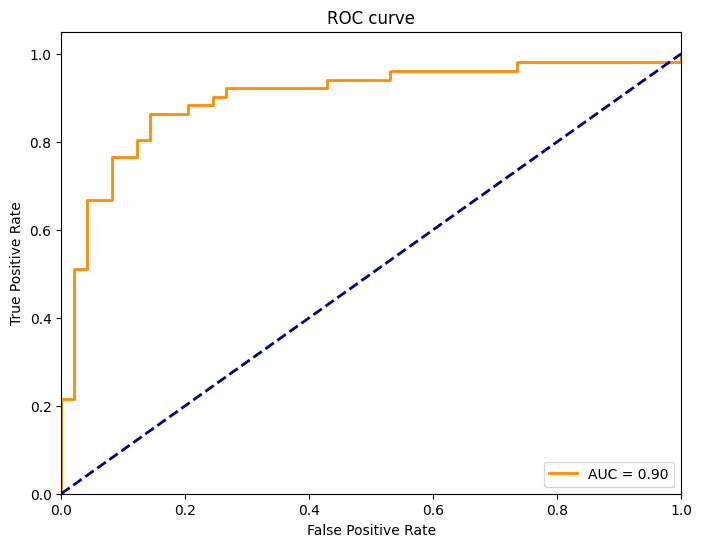

In [ ]:
model = grid_search.best_estimator_

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

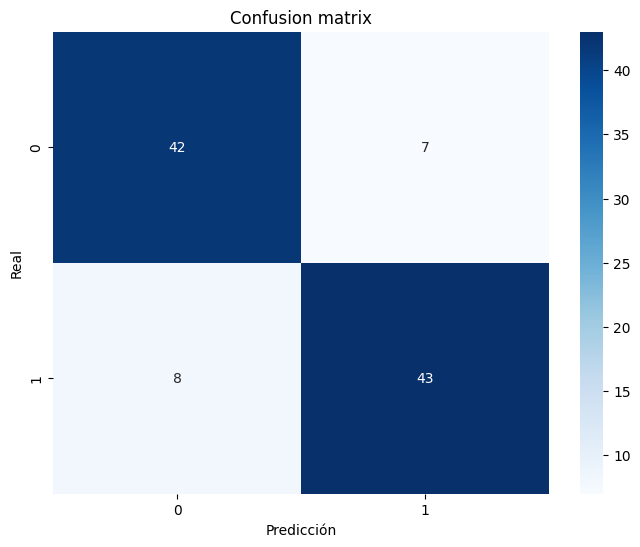

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion matrix')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

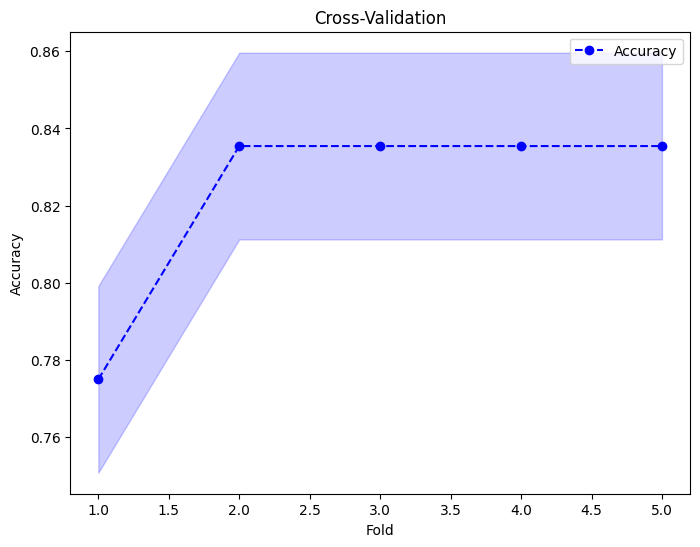

In [ ]:
# Cross Validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b', label='Accuracy')
plt.fill_between(range(1, 6), cv_scores - cv_scores.std(), cv_scores + cv_scores.std(), color='blue', alpha=0.2)
plt.title('Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_test = grid_search.best_estimator_.predict(X_test_tfidf)

# Final evaluation
print("Final evaluation SVM with best params:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Final evaluation SVM with best params:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.86      0.84      0.85        51

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



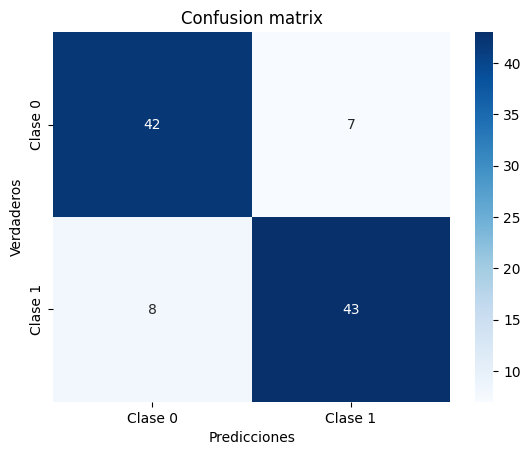

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title("Confusion matrix")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()



In [ ]:
# AUC-ROC
y_prob = grid_search.best_estimator_.predict_proba(X_test_tfidf)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8995598239295719


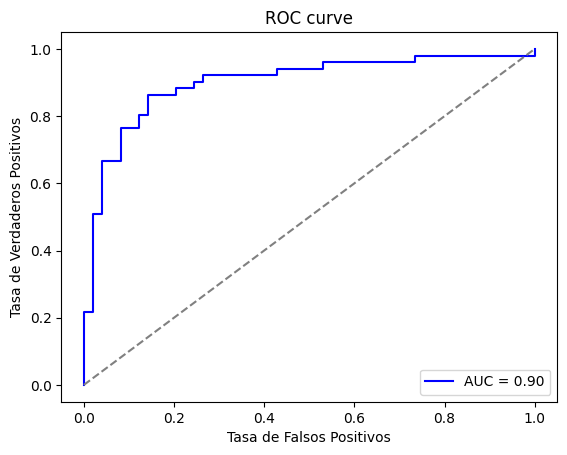

In [ ]:
# Gráfica AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()